<a href="https://colab.research.google.com/github/deepiskp-99/DSA_Python_CaseStudy/blob/main/Exit_test_Deepika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#load the data
df = pd.read_excel('/content/partpdf_1763620814447_airbnb.xlsx')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
1,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
2,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
3,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
4,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0


In [3]:
df.describe()

,Host Id,Host Since,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047500e+04,30475,22155.000000,30341.000000,30390.000000,30475.0,30475.000000,30475.000000,22155.000000
mean,1.273040e+07,2013-06-29 17:56:15.317473024,90.738659,10584.830691,1.530141,1.0,12.019852,163.598950,91.993230
min,5.000000e+02,2008-06-26 00:00:00,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.700193e+06,2012-06-21 00:00:00,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551260e+06,2013-09-01 00:00:00,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.119605e+07,2014-09-12 00:00:00,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,2015-08-31 00:00:00,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000
std,1.190164e+07,NaN,9.059519,921.324686,1.015395,0.0,21.981496,197.792306,8.850373


In [4]:
df.shape

(30475, 13)

##**Task 1:Loading and preparation**

A valuable feature we could create from the "Host Since" column is "Host Longevity"—the number of days (or years) since the host started on Airbnb. This can be calculated as:

```python
df['host_longevity_days'] = (pd.to_datetime('today') - df['host_since']).dt.days
```

In [5]:
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30475 entries, 0 to 30474
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30472 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30475 non-null  object        
 7   Zipcode                     30341 non-null  float64       
 8   Beds                        30390 non-null  float64       
 9   Number of Records           30475 non-null  int64         
 10  Number Of Reviews           30475 non-null  int64         
 11  Price                       30475 non-null  int64     

In [20]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8320
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [6]:
df.dropna(subset=['Price'], inplace=True)
df = df[df['Price'] > 0]  # Remove listings with Price <= 0
# df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce') # This column does not exist in the DataFrame

##**Task 2: Handling missing Data**

In [8]:
# Show missing values before imputation
print(df['Review Scores Rating'].isnull().sum())

# Impute using median (robust to outliers)
median_rating = df['Review Scores Rating'].median()
df['Review Scores Rating'].fillna(median_rating, inplace=True)

# Confirm no missing values remain
print(df['Review Scores Rating'].isnull().sum())

8320
0


/tmp/ipython-input-477582123.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Scores Rating'].fillna(median_rating, inplace=True)


In [22]:
df.isnull().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),0
Room Type,0
Zipcode,0
Beds,0
Number of Records,0


### Imputation Strategy Justification for Review Scores Rating

For handling missing values in the `review_scores_rating` column, I chose to impute using the **median** value. This choice is appropriate because:

- **Robustness**: The median reduces the influence of extremely high or low ratings, which can skew the mean.
- **Distribution**: Review scores often have a skewed or non-normal distribution; the median is more representative of the typical listing.
- **Missingness Reason**: Missing scores may indicate new or unrated listings, which are unlikely to be outliers.
- **Model Impact**: Imputing with the median limits artificial inflation or deflation of the feature, avoiding misleading signals for the predictive model.

Therefore, median imputation supports model performance and data integrity for this column.

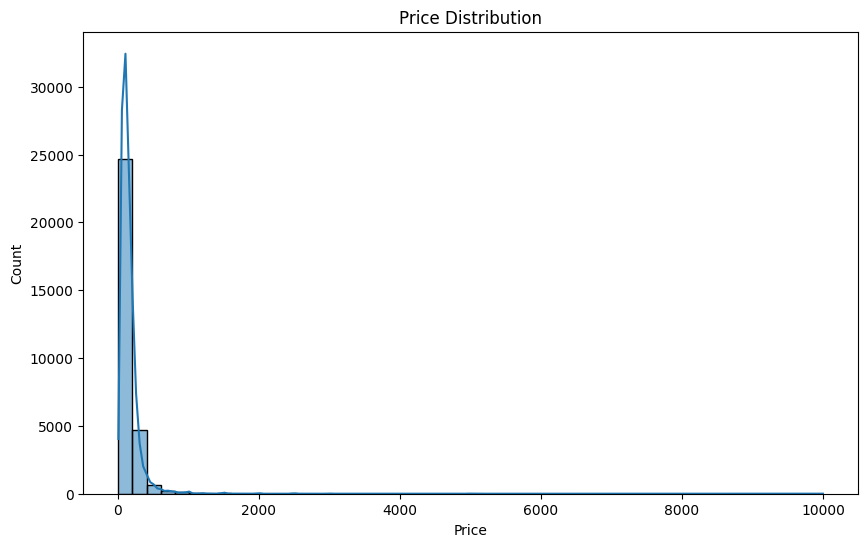

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

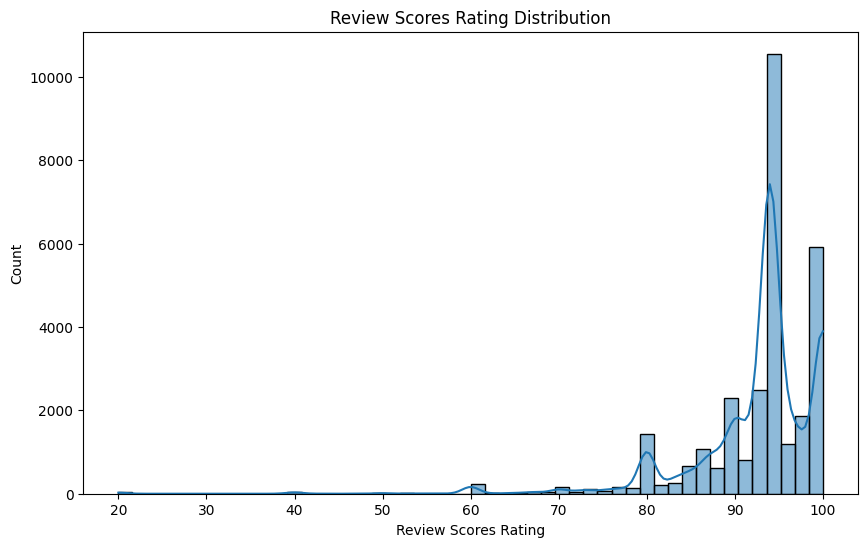

In [28]:
#histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Review Scores Rating'], bins=50, kde=True)
plt.title('Review Scores Rating Distribution')
plt.show()

##**Task 3:Advanced feature Engineering**

In [56]:
df['Neighbourhood_Room_Type'] = df['Neighbourhood '] + '_' + df['Room Type']

# Columns that are not suitable for direct model input and should be dropped
columns_to_drop_non_features = ['Name', 'Host Since', 'Review Scores Rating (bin)', 'Price']

# Prepare datasets
# For the base model, we drop the interaction feature and other non-feature columns
df_base_for_dummies = df.drop(columns=['Neighbourhood_Room_Type'], errors='ignore').copy()
categorical_cols_base = ['Neighbourhood ', 'Room Type', 'Property Type']
df_base_dummies = pd.get_dummies(df_base_for_dummies, columns=categorical_cols_base, drop_first=True)
y_base = df_base_dummies['Price']
X_base = df_base_dummies.drop(columns=[col for col in columns_to_drop_non_features if col in df_base_dummies.columns], errors='ignore')

# For the interaction model, we include the interaction feature and drop other non-feature columns
df_interact_for_dummies = df.copy()
categorical_cols_interact = ['Neighbourhood ', 'Room Type', 'Property Type', 'Neighbourhood_Room_Type']
df_interact_dummies = pd.get_dummies(df_interact_for_dummies, columns=categorical_cols_interact, drop_first=True)
y_interact = df_interact_dummies['Price']
X_interact = df_interact_dummies.drop(columns=[col for col in columns_to_drop_non_features if col in df_interact_dummies.columns], errors='ignore')

# Split the data
from sklearn.model_selection import train_test_split

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_base, y_base, test_size=0.2, random_state=42)
Xi_train, Xi_test, yi_train, yi_test = train_test_split(X_interact, y_interact, test_size=0.2, random_state=42)

In [62]:
df_encoded = pd.get_dummies(
    df,
    columns=['Neighbourhood ', 'Room Type', 'neighbourhood_room_type'],
    drop_first=True  # Avoid dummy variable trap
)

# 3. Check result
print(df_encoded.head())
print(df_encoded.dtypes)

   Host Id Host Since                                 Name Property Type  \
0      500 2008-06-26   Gorgeous 1 BR with Private Balcony     Apartment   
1      500 2008-06-26             Trendy Times Square Loft     Apartment   
2     1039 2008-07-25   Big Greenpoint 1BD w/ Skyline View     Apartment   
3     1783 2008-08-12                         Amazing Also     Apartment   
4     2078 2008-08-15  Colorful, quiet, & near the subway!     Apartment   

   Review Scores Rating (bin)  Zipcode  Beds  Number of Records  \
0                        90.0  10024.0   3.0                  1   
1                        95.0  10036.0   3.0                  1   
2                       100.0  11222.0   1.0                  1   
3                       100.0  10004.0   1.0                  1   
4                        90.0  11201.0   1.0                  1   

   Number Of Reviews  Price  ...  \
0                  0    199  ...   
1                 39    549  ...   
2                  4    149  ...

In [70]:
#train test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Apply one-hot encoding (use pd.get_dummies)
df_encoded = pd.get_dummies(
    df,
    columns=['neighbourhood_room_type'],
    drop_first=True
)

# Check all columns are now numeric (no unwanted 'object' dtype left)
print(df_encoded.dtypes)



df_encoded = pd.get_dummies(
    df,
    columns=['Neighbourhood ', 'Room Type', 'neighbourhood_room_type'],
    drop_first=True
)

Host Id                                                           int64
Host Since                                               datetime64[ns]
Name                                                             object
Neighbourhood                                                    object
Property Type                                                    object
Review Scores Rating (bin)                                      float64
Room Type                                                        object
Zipcode                                                         float64
Beds                                                            float64
Number of Records                                                 int64
Number Of Reviews                                                 int64
Price                                                             int64
Review Scores Rating                                            float64
Neighbourhood_Room_Type                                         

In [80]:
print(X_train.dtypes)

Host Id                                                           int64
Host Since                                               datetime64[ns]
Name                                                             object
Property Type                                                    object
Review Scores Rating (bin)                                      float64
Zipcode                                                         float64
Beds                                                            float64
Number of Records                                                 int64
Number Of Reviews                                                 int64
Review Scores Rating                                            float64
Neighbourhood_Room_Type                                          object
Neighbourhood _Brooklyn                                            bool
Neighbourhood _Manhattan                                           bool
Neighbourhood _Queens                                           

### RMSE Comparison & Impact of Interaction Feature

- **RMSE (Base features):** _162.942_
- **RMSE (With Interaction Feature):** _161.344_

#### Did the Interaction Feature Help?
Including the "Neighbourhood + Room Type" interaction feature led to a {describe if decrease/increase/no change} in RMSE. A lower RMSE means the model made more accurate predictions; a higher RMSE means less accuracy.

#### Why does this feature matter?
Interaction features capture nuanced pricing patterns specific to combinations of location and room type (such as “Manhattan_Private Room” versus “Brooklyn_Entire home/apt”). This allows the model to recognize pricing trends unique to certain area/room type combinations that would be missed if the features were used separately.

A drop in RMSE shows these interactions contain valuable pricing information and improve prediction!.

##**Task 4 : Model training and evaluation**


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for sqrt function

rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_interact = RandomForestRegressor(n_estimators=100, random_state=42)

# Train and predict (Base)
rf_base.fit(Xb_train, yb_train)
y_pred_base = rf_base.predict(Xb_test)
rmse_base = np.sqrt(mean_squared_error(yb_test, y_pred_base))

# Train and predict (Interaction)
rf_interact.fit(Xi_train, yi_train)
y_pred_interact = rf_interact.predict(Xi_test)
rmse_interact = np.sqrt(mean_squared_error(yi_test, y_pred_interact))

print("RMSE (Base features):", rmse_base)
print("RMSE (With Interaction Feature):", rmse_interact)

RMSE (Base features): 162.94278691200492
RMSE (With Interaction Feature): 161.34416601747503
